# 오차 시각화 하기

## 기본 오차 막대

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

C:\Users\231610\AppData\Local\Temp\ipykernel_9224\3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
x=np.linspace(0,10,50)
dy=0.8
y=np.sin(x) + dy*np.random.randn(50)
y

array([-1.33819974, -0.95795911, -1.80018359,  1.67133201,  0.61446236,
        1.05365133,  1.66894899,  0.97284976,  0.71771428,  1.87051167,
        1.45061562,  0.22072373,  2.02592294, -0.31205191,  0.24703864,
        0.5677135 ,  1.04875746,  0.60617432, -0.96291619, -0.1828684 ,
       -0.75601809,  0.26874693, -1.90554664, -0.52369842,  0.66491441,
       -1.29370861, -2.09921832, -1.87772498, -1.41890148, -0.75097925,
        0.4149081 ,  0.82594774, -0.44237185,  0.30937799,  1.694037  ,
        0.78034937,  1.34558698,  0.72296353,  1.6786199 ,  0.83781629,
        0.95844416,  3.00923727,  0.30231846, -0.73857932, -0.35113511,
       -1.27612283,  1.76451104, -0.7848338 , -0.48105157, -0.62878958])

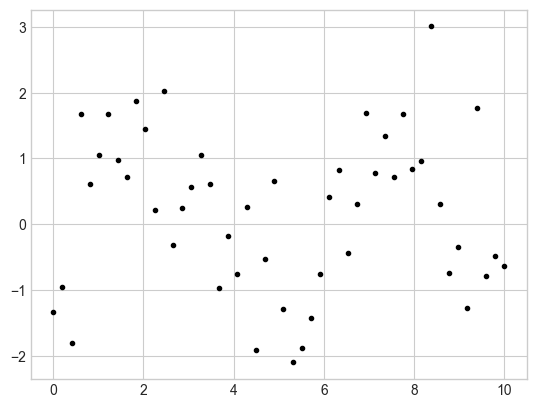

In [6]:
plt.plot(x,y,".k")

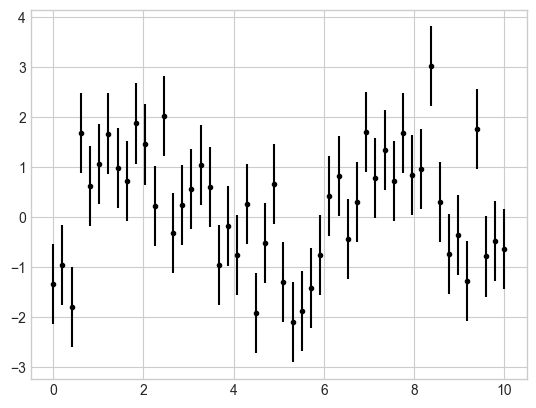

In [7]:
plt.errorbar(x,y,yerr=dy, fmt='.k');

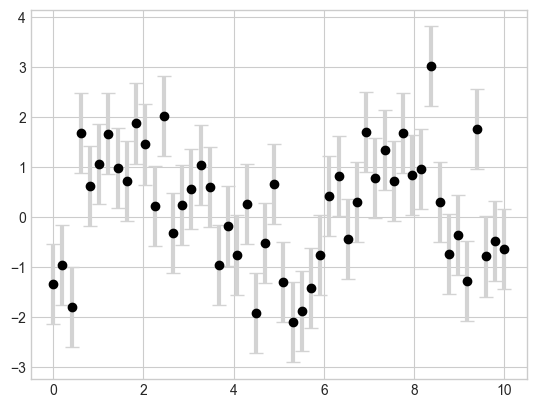

In [12]:
# 오차막대에 대한 다양한 옵션도 제공한다. 
plt.errorbar(x,y,yerr=dy, fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=5);

## 연속 오차

In [16]:
import sklearn.gaussian_process as gp

In [22]:
#익명함수로 함수를 만든다음에 변수에함수를 대입한다.
model = lambda x: x*np.sin(x)

In [23]:
#함수를 처음부터 정의한다
def fun(x):
    return x*np.sin(x)

In [24]:
xdata= np.array([1,3,5,6,8])
xdata

array([1, 3, 5, 6, 8])

In [25]:
ydata = model(xdata)
ydata

array([ 0.84147098,  0.42336002, -4.79462137, -1.67649299,  7.91486597])

In [27]:
#Gaussain Process Regression
gp_model = gp.GaussianProcessRegressor()
gp_model

GaussianProcessRegressor()

In [30]:
xdata.reshape(-1,1).shape

(5, 1)

In [32]:
gp_model.fit(xdata.reshape(-1,1), ydata)

GaussianProcessRegressor()

In [35]:
xfit = np.linspace(0,10, 1000)

In [37]:
yfit, sigma = gp_model.predict(xfit.reshape(-1,1), return_std=True)
dyfit = 2*sigma

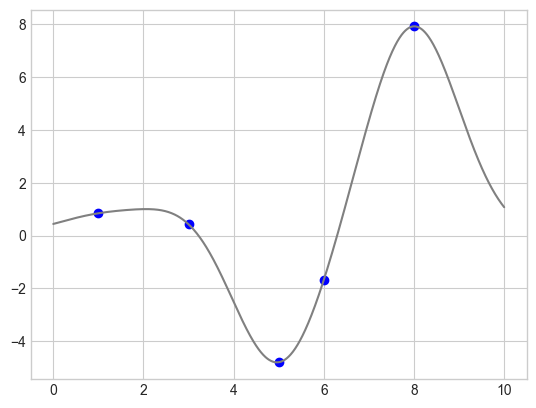

In [38]:
plt.plot(xdata, ydata, 'ob')
plt.plot(xfit, yfit, '-', color='gray')

(0.0, 10.0)

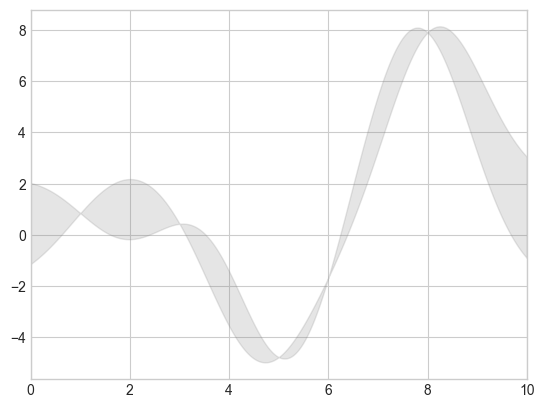

In [43]:
plt.fill_between(xfit, yfit-dyfit, yfit+dyfit, color='gray', alpha=0.2)
plt.xlim(0,10)

# 밀도 플롯과 등고선 플롯
* plt.contour : 등고선 플롯
* plt.contourf: 색이 채워진 등고선 플롯
* plt.imshow : 이미지

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

C:\Users\231610\AppData\Local\Temp\ipykernel_9224\1072485847.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [49]:
def f(x,y):
    return np.sin(x)**10 + np.cos(10+y*x)*np.cos(x)

x=np.linspace(0,5,50)
y=np.linspace(0,5,40)
f(1,1)

0.18037951456042278

In [50]:
X,Y=np.meshgrid(x,y)
Z=f(X,Y)

In [66]:
Z

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.8275558 , -0.80744041, ...,  0.93467448,
         0.77467433,  0.55894214],
       [-0.83907153, -0.820263  , -0.79266951, ...,  0.98503397,
         0.88847607,  0.73757604],
       ...,
       [-0.83907153, -0.48696962, -0.02692065, ...,  0.98525345,
         0.79584263,  0.46799565],
       [-0.83907153, -0.47558005, -0.00130271, ...,  0.93488414,
         0.6993547 ,  0.37933079],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

In [55]:
X.shape

(40, 50)

In [56]:
Y.shape

(40, 50)

In [53]:
Z.shape

(40, 50)

## Contour

In [72]:
print(X[0,1], Y[0,1], Z[0,1])

0.10204081632653061 0.0 -0.8347069739562916


In [73]:
f(X[0,1],Y[0,1])

-0.8347069739562916

C:\Users\231610\AppData\Local\Temp\ipykernel_9224\1399892994.py:1: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(X,Y,Z, color='black');


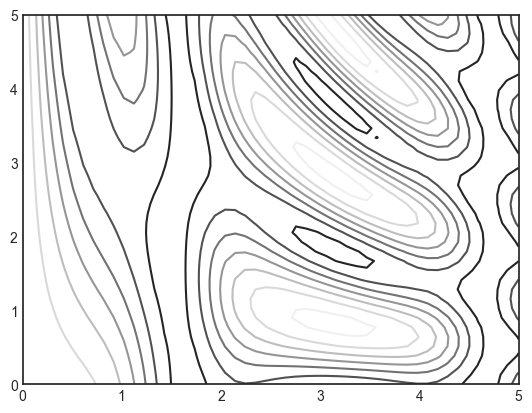

In [76]:
plt.contour(X,Y,Z, color='black');

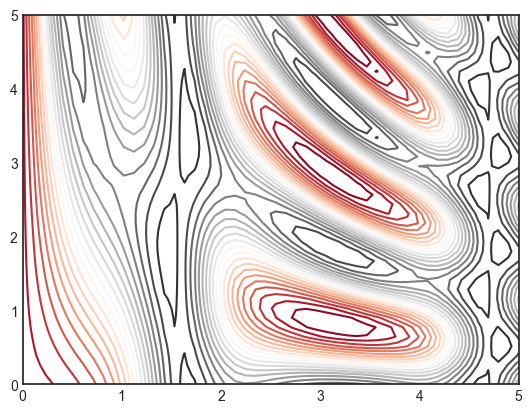

In [10]:
plt.contour(X,Y,Z, 20, cmap='RdGy');

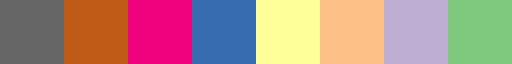

In [11]:
plt.cm.Accent_r

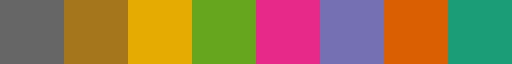

In [81]:
plt.cm.Dark2_r

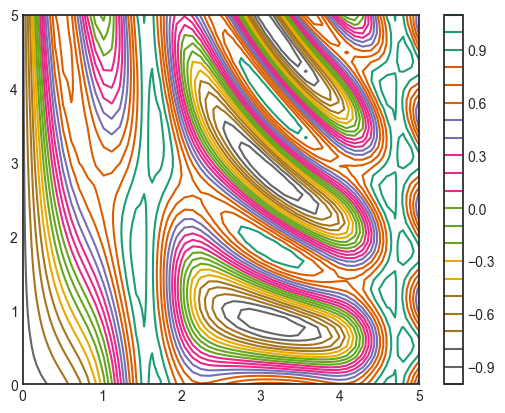

In [85]:
plt.contour(X,Y,Z, 20, cmap='Dark2_r')
plt.colorbar();

## contourf

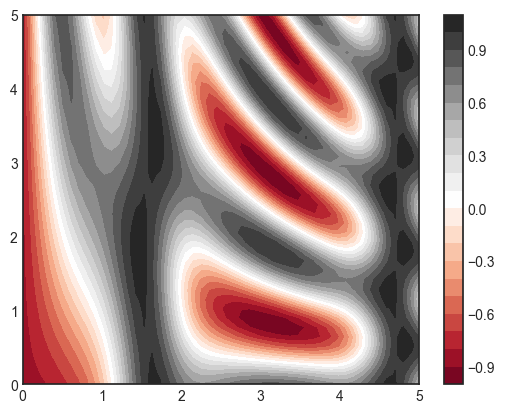

In [84]:
plt.contourf(X,Y,Z, 20, cmap='RdGy')
plt.colorbar();

## imshow

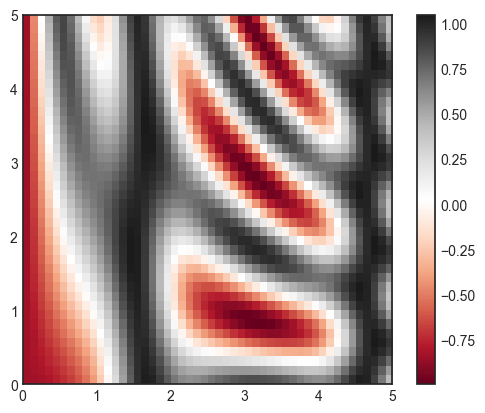

In [41]:
plt.imshow(Z,extent=[0,5,0,5], origin='lower', cmap='RdGy', aspect='equal')
plt.colorbar()

## Combine

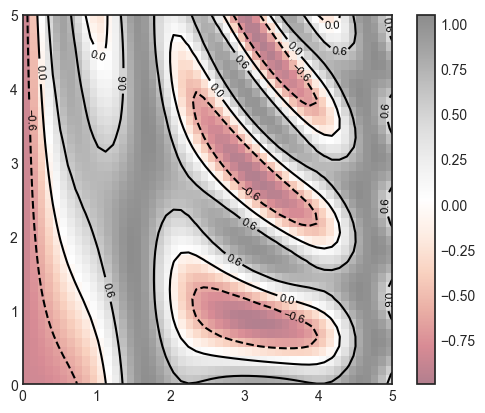

In [51]:
contours = plt.contour(X,Y,Z, 3, colors ='black') # 등고선을 그린다. 
plt.clabel(contours, inline=True, fontsize=8) #label을 붙인다. 
plt.imshow(Z,extent=[0,5,0,5], origin='lower', cmap='RdGy', alpha=0.5) #채워진 등고선
plt.colorbar(); #옆에 colorbar

# 히스토그램

## 1차원 히스토그램

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

C:\Users\231610\AppData\Local\Temp\ipykernel_16504\2840076777.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [3]:
data = np.random.randn(1000)

(array([ 10.,  27.,  96., 214., 260., 230., 110.,  42.,  10.,   1.]),
 array([-3.26189355, -2.55355794, -1.84522233, -1.13688672, -0.42855112,
         0.27978449,  0.9881201 ,  1.69645571,  2.40479131,  3.11312692,
         3.82146253]),
 <BarContainer object of 10 artists>)

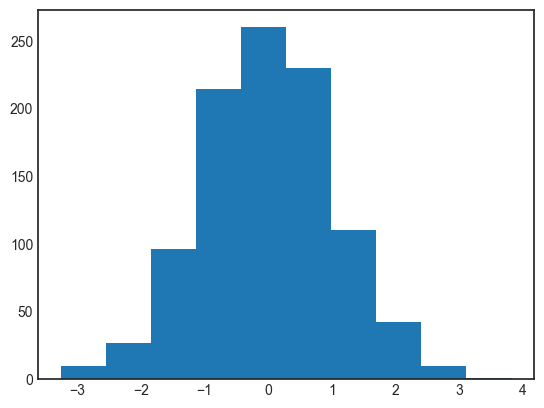

In [5]:
plt.hist(data)

(array([0.00423528, 0.01270584, 0.02541168, 0.00847056, 0.03388224,
        0.07199977, 0.10588201, 0.13552898, 0.16517594, 0.23294043,
        0.3049402 , 0.36846941, 0.35576356, 0.34305772, 0.40235165,
        0.39388109, 0.31341076, 0.26682267, 0.19905818, 0.14823482,
        0.11858785, 0.07623505, 0.06776449, 0.03388224, 0.02541168,
        0.00847056, 0.00847056, 0.        , 0.        , 0.00423528]),
 array([-3.26189355, -3.02578168, -2.78966981, -2.55355794, -2.31744607,
        -2.0813342 , -1.84522233, -1.60911046, -1.37299859, -1.13688672,
        -0.90077485, -0.66466298, -0.42855112, -0.19243925,  0.04367262,
         0.27978449,  0.51589636,  0.75200823,  0.9881201 ,  1.22423197,
         1.46034384,  1.69645571,  1.93256758,  2.16867944,  2.40479131,
         2.64090318,  2.87701505,  3.11312692,  3.34923879,  3.58535066,
         3.82146253]),
 <BarContainer object of 30 artists>)

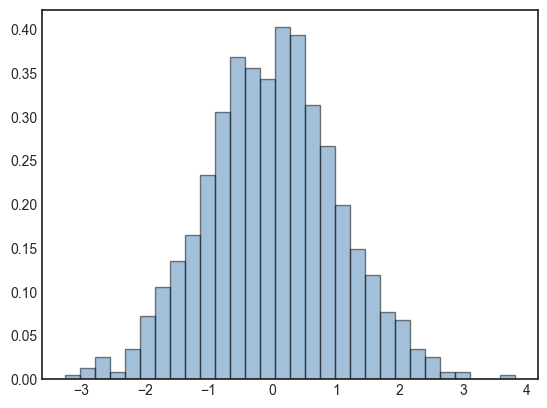

In [14]:
plt.hist(data, bins=30, alpha=0.5, density=True,
        histtype='bar', color='steelblue',
        edgecolor='k')

In [15]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

In [27]:
a ={"x":1,"y":2,"z":3}
a

{'x': 1, 'y': 2, 'z': 3}

In [31]:
def fun(x,y,z):
    print(x,y,z)
    
fun(**a)

1 2 3


In [32]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
kwargs

{'histtype': 'stepfilled', 'alpha': 0.3, 'density': True, 'bins': 40}

(array([0.00313479, 0.00313479, 0.00940436, 0.        , 0.        ,
        0.00626957, 0.01253914, 0.02507828, 0.03134785, 0.02821307,
        0.03134785, 0.04075221, 0.05956092, 0.10344791, 0.1253914 ,
        0.11912183, 0.17868275, 0.14420012, 0.15987404, 0.17554797,
        0.19122189, 0.21630017, 0.2319741 , 0.21630017, 0.17241318,
        0.1473349 , 0.18808711, 0.10344791, 0.08150441, 0.07836963,
        0.06583049, 0.07523484, 0.04702178, 0.02507828, 0.01253914,
        0.00313479, 0.01253914, 0.00626957, 0.        , 0.00313479]),
 array([-4.06149236, -3.74249123, -3.4234901 , -3.10448896, -2.78548783,
        -2.4664867 , -2.14748557, -1.82848444, -1.50948331, -1.19048218,
        -0.87148104, -0.55247991, -0.23347878,  0.08552235,  0.40452348,
         0.72352461,  1.04252574,  1.36152688,  1.68052801,  1.99952914,
         2.31853027,  2.6375314 ,  2.95653253,  3.27553367,  3.5945348 ,
         3.91353593,  4.23253706,  4.55153819,  4.87053932,  5.18954045,
         5.50854

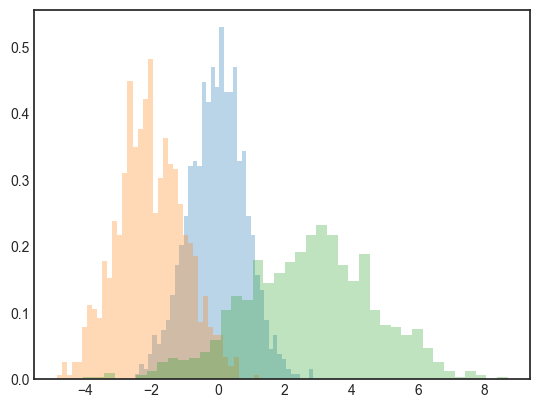

In [33]:
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [34]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 37 310 490 152  11]


## 2차원 히스토그램

In [35]:
mean = [0,0]
cov=[[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,10000).T

In [37]:
x,y

(array([ 0.62928449, -0.63997451, -0.75775224, ...,  0.59418425,
        -1.47264791,  0.88759194]),
 array([ 1.591679  ,  1.2618237 , -1.50506824, ...,  0.2505447 ,
        -2.14219579,  1.39886597]))

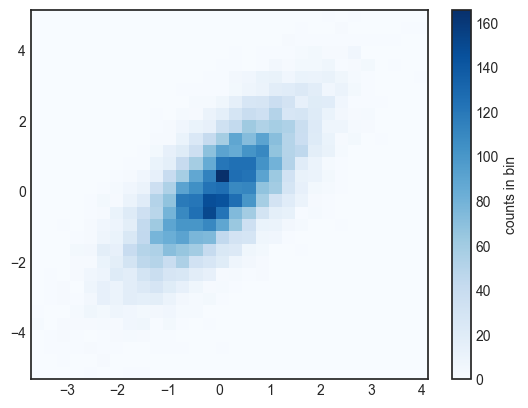

In [39]:
plt.hist2d(x,y,bins=30, cmap='Blues')
cb =plt.colorbar()
cb.set_label('counts in bin')

In [41]:
# 필요한 데이터만 직접 뽑을 수 있다. 
counts, xedges, yedges = np.histogram2d(x,y,bins=30)
print(counts.shape, xedges.shape, yedges.shape)

(30, 30) (31,) (31,)


## 커널 밀도 추정
* KDE: kernel density estimation

In [47]:
from scipy.stats import gaussian_kde
import pandas as pd

data = np.vstack([x,y])
data

array([[ 0.62928449, -0.63997451, -0.75775224, ...,  0.59418425,
        -1.47264791,  0.88759194],
       [ 1.591679  ,  1.2618237 , -1.50506824, ...,  0.2505447 ,
        -2.14219579,  1.39886597]])

In [49]:
kde = gaussian_kde(data)
kde

In [50]:
# 정규 그리드 평가
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6,6,40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

In [52]:
Z= kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()])) #히스토그램이 아니라 kernel 기반의 밀도를 추정한다. 
Z.shape

(1600,)

In [55]:
Z.reshape(Xgrid.shape).shape

(40, 40)

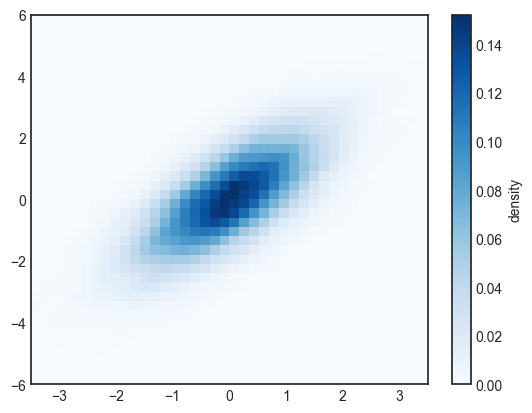

In [56]:
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6], 
          cmap='Blues')

cb = plt.colorbar()
cb.set_label('density')